# 视觉数据预处理

本实验使用MindSpore实现视觉数据预处理，包括数据的获取和预处理。结合课程学习，通过实验可以了解数据集加载的基本实现过程和视觉数据预处理流程。

## 1 视觉数据获取

数据是深度学习的基础，高质量数据输入在深度神经网络中起到积极作用。在本实验中，我们首先介绍视觉数据的获取方法，之后举例演示在MindSpore框架下加载常用数据集及自定义数据集的方法。

### 1.1 数据加载

在计算机视觉任务中，图像数据往往因为容量限制难以直接全部读入内存。MindSpore提供的`dataset`模块目前支持加载图像领域常用的经典数据集和标准格式数据集，使得用户能够轻松进行数据加载操作。同时，在各个数据集类中还内置了数据处理和数据增强算子，使得数据在训练过程中能够像经过pipeline管道的水一样源源不断地流向训练系统，提升数据训练效果。

这里我们首先举例介绍如何使用`Cifar10Dataset`接口和`MnistDataset`接口分别加载CIFAR-10数据集和MNIST数据集，然后介绍如何使用`GeneratorDataset`实现自定义数据集加载。

#### 1.1.1 经典数据集加载

##### CIFAR-10数据集加载

1. 通过`mindvision.dataset.DownLoad.download_and_extract_archive`接口下载和解压CIFAR-10数据集压缩文件。

接口部分参数如下：

+ `url`：数据集下载链接地址。
+ `download_path`：数据集根目录位置。

示例代码如下所示，网络状况良好的情况下此段代码预计需执行三至五分钟。

In [3]:
import os
from mindvision.dataset import DownLoad

# CIFAR-10数据集保存路径
dataset_path_cifar10 = "./datasets/cifar10"
# CIFAR-10数据集下载链接
dataset_url_cifar10 = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/cifar-10-binary.tar.gz"

dl = DownLoad()

# 下载并解压CIFAR-10数据集压缩文件
dl.download_and_extract_archive(
    url=dataset_url_cifar10, download_path=dataset_path_cifar10)

CIFAR-10数据集文件存放在./datasets/cifar10路径中，目录结构如下：

```text
./datasets/cifar10/
    ├── cifar-10-batches-bin
    │   ├── batches.meta
    │   ├── data_batch_1
    │   ├── data_batch_2
    │   ├── data_batch_3
    │   ├── data_batch_4
    │   ├── data_batch_5
    │   ├── readme.html
    │   └── test_batch
    └── cifar-10-python.tar.gz
```

2. 使用[mindspore.dataset.Cifar10Dataset](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset/mindspore.dataset.Cifar10Dataset.html#mindspore.dataset.Cifar10Dataset)接口加载CIFAR-10数据集，同时可以用`create_dict_iterator`接口创建数据迭代器，迭代访问数据，访问的数据类型默认为`Tensor`。示例代码如下：

Image shape: (32, 32, 3) , Label: 9
Image shape: (32, 32, 3) , Label: 2
Image shape: (32, 32, 3) , Label: 0
Image shape: (32, 32, 3) , Label: 8


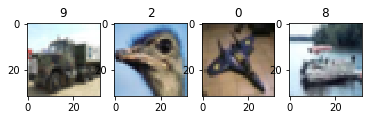

In [4]:
import math
import matplotlib.pyplot as plt
import mindspore.dataset as ds

ds.config.set_seed(1)

DATA_DIR_CIFAR10 = "./datasets/cifar10/cifar-10-batches-bin/"


# 加载数据集，选取4张图片
dataset_cifar10 = ds.Cifar10Dataset(DATA_DIR_CIFAR10, num_samples=4)


def plt_result(dataset, row):
    """显示数据集"""
    num = 1
    for data in dataset.create_dict_iterator():
        print("Image shape:", data['image'].shape, ", Label:", data['label'])
        plt.subplot(row, math.ceil(
            dataset.get_dataset_size() / row), num)   # 显示位置
        image = data['image'].asnumpy()
        # 显示标题
        plt.title(data['label'])
        # 显示内容
        plt.imshow(image, interpolation="None")
        num += 1


plt_result(dataset_cifar10, 1)

##### MNIST数据集加载

1. 同样通过`mindvision.dataset.DownLoad.download_and_extract_archive`接口下载和解压MNIST数据集压缩文件。

示例代码如下所示，网络状况良好的情况下此段代码预计需执行三至五分钟。

In [5]:
import os
from mindvision.dataset import DownLoad

# MNIST数据集保存路径
dataset_path_mnist = "./datasets/mnist"

# MNIST数据集下载链接
dataset_url_mnist_labels = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
dataset_url_mnist_images = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"

dl = DownLoad()

# 下载并解压MNIST数据集压缩文件
dl.download_and_extract_archive(
    url=dataset_url_mnist_labels, download_path=dataset_path_mnist)
dl.download_and_extract_archive(
    url=dataset_url_mnist_images, download_path=dataset_path_mnist)

image_gz = "./datasets/mnist/train-images-idx3-ubyte.gz"
label_gz = "./datasets/mnist/train-labels-idx1-ubyte.gz"

# 删除压缩文件
if os.path.exists(image_gz):
    os.remove(image_gz)
if os.path.exists(label_gz):
    os.remove(label_gz)

29696B [00:00, 181683.00B/s]                            
9913344B [00:05, 1834287.05B/s]                              


下载好的MNIST数据集文件存放在./datasets/mnist路径中，目录结构如下：

```text
./datasets/mnist/
    ├── train-images-idx3-ubyte
    └── train-labels-idx1-ubyte
```

> 删除压缩文件的目的是为了避免调用`create_dict_iterator`时出错。

2. 使用[mindspore.dataset.MnistDataset](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset/mindspore.dataset.MnistDataset.html#mindspore.dataset.MnistDataset)接口加载MINIST数据集，并用`create_dict_iterator`接口创建数据迭代器，迭代访问数据，访问的数据类型默认为`Tensor`。示例代码如下：

Image shape: (28, 28) , Label: 7
Image shape: (28, 28) , Label: 2
Image shape: (28, 28) , Label: 4
Image shape: (28, 28) , Label: 4


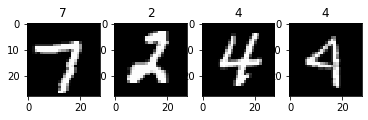

In [6]:
import math
import matplotlib.pyplot as plt
import mindspore.dataset as ds

ds.config.set_seed(1)

DATA_DIR_MNIST = "./datasets/mnist/"


# 加载数据集，选取4张图片
dataset_mnist = ds.MnistDataset(DATA_DIR_MNIST, num_samples=4)


def plt_result(dataset, row):
    """显示数据集"""
    num = 1
    for data in dataset.create_dict_iterator():
        print("Image shape:", data['image'].shape[:2], ", Label:", data['label'])
        plt.subplot(row, math.ceil(
            dataset.get_dataset_size() / row), num)   # 显示位置
        image = data['image'].asnumpy()
        # 显示标题
        plt.title(data['label'])
        # 显示内容
        plt.imshow(image.squeeze(), interpolation="None", cmap=plt.cm.gray)
        num += 1


plt_result(dataset_mnist, 1)

> `mindspore.dataset`除了可用于加载CIFAR-10数据集外，还提供了加载和处理各种通用数据集的API，如CIFAR-100、VOC、COCO等，详细加载方法可参考[mindspore.dataset API文档](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/mindspore.dataset.html)。

#### 1.3.2 自定义数据集加载

对于我们自己构造的图像数据集，`dataset`暂不支持直接加载，我们可以通过[ImageFolderDataset](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset/mindspore.dataset.ImageFolderDataset.html?highlight=imagefolderdataset#mindspore.dataset.ImageFolderDataset.map)接口实现加载。

下面我们通过代码实例来说明如何使用`ImageFolderDataset`来加载自定义数据集。

1. 构造自定义的数据集

这里我们构建了一个简单的猫狗分类数据集，分别有“cat”和“dog”两类标签，每个标签下有两张图像。我们将相同类别的图像放在同一文件夹下，不同类别以不同文件夹区分，自定义的数据集文件存放在./datasets/custom路径中，目录结构如下：

```text
./datasets/custom/
   ├── cat
   │   ├── cat1.jpg
   │   └── cat2.jpg
   └── dog
        ├── dog1.jpg
        └── dog2.jpg
```

2. 加载自定义数据集及显示

`ImageFolderDataset`接口会根据不同文件夹分配对应标签，同一个文件夹中的所有图片将被分配相同的标签。

部分参数说明：

+ `dataset_dir`：包含数据集文件的根目录的路径。
+ `decode`：是否对读取的图片进行解码操作，默认值：False，不解码。

示例代码如下。

Image shape: (507, 530, 3) , Label: 1
Image shape: (520, 500, 3) , Label: 1
Image shape: (507, 530, 3) , Label: 2
Image shape: (500, 557, 3) , Label: 2


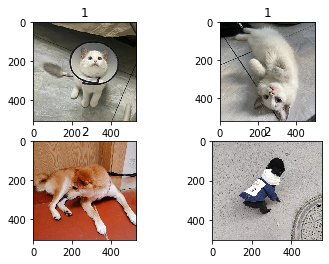

In [7]:
import math
import matplotlib.pyplot as plt
import mindspore.dataset as ds

ds.config.set_seed(1)

# 自定义数据集加载路径
DATA_DIR_CUSTOM = "./datasets/custom"


# 加载数据集，选取图片
dataset_custom = ds.ImageFolderDataset(
    dataset_dir=DATA_DIR_CUSTOM, decode=True)


def plt_result(dataset, row):
    """显示数据集"""
    num = 1
    for data in dataset.create_dict_iterator():
        print("Image shape:", data['image'].shape, ", Label:", data['label'])
        plt.subplot(row, math.ceil(
            dataset.get_dataset_size() / row), num)   # 显示位置
        image = data['image'].asnumpy()
        # 显示标题
        plt.title(data['label'])
        # 显示内容
        plt.imshow(image, interpolation="None")
        num += 1


plt_result(dataset_custom, 2)

## 2 数据预处理

MindSpore目前支持如分批、重复、裁剪、翻转、缩放、反相等常用图像数据处理操作。在本节我们以CIFAR-10数据集为例，展示数据处理的方法。

### 2.1 数据分批

数据分批操作将数据集分批，分别输入到训练系统中进行训练，可以减少训练轮次，达到加速训练过程的目的。

数据分批可以用`batch`接口实现。

部分参数说明：

+ `batch_size`：每组包含的数据个数，`batch_size=4`设置每组包含4个数据。

+ `drop_remainder`：当最后一个批处理数据包含的数据条目小于`batch_size`时，是否将该批处理丢弃，不传递给下一个操作。默认值：False，不丢弃。

下面的样例展示了CIFAR-10数据集的分批结果，其中批大小为4。

Image shape: (32, 32, 3) ,Label: 9
Image shape: (32, 32, 3) ,Label: 2
Image shape: (32, 32, 3) ,Label: 0
Image shape: (32, 32, 3) ,Label: 8
after batch: 
Image shape: (4, 32, 32, 3) , Label: [9 2 0 8]


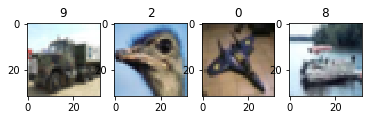

In [8]:
import math
import matplotlib.pyplot as plt
import mindspore.dataset as ds

ds.config.set_seed(1)

DATA_DIR_CIFAR10 = "./datasets/cifar10/cifar-10-batches-bin/"

# 加载数据集，选取4张图片
dataset_cifar10 = ds.Cifar10Dataset(DATA_DIR_CIFAR10, num_samples=4)

for data in dataset_cifar10.create_dict_iterator():
    print("Image shape:", data['image'].shape, ",Label:", data['label'])

# 对数据进行分批操作
dataset = dataset_cifar10.batch(batch_size=4, drop_remainder=False)

print('after batch: ')

for data in dataset.create_dict_iterator():
    print("Image shape:", data['image'].shape, ", Label:", data['label'])

def plt_result(dataset, row):
    """显示数据集"""
    num = 1
    for data in dataset.create_dict_iterator():
        for i in range(4):
            plt.subplot(row, math.ceil(8 / row), num)      # 显示位置
            image = data['image'].asnumpy()
            label = data['label'].asnumpy()
            plt.title(label[i])                            # 显示标题
            plt.imshow(image[i], interpolation="None")   # 显示内容
            num += 1

plt_result(dataset, 2)

从上面的打印结果可以看出，数据集大小为4，设置批大小为4时，4个样本被合成了一组。

### 2.2 数据重复

数据重复操作对数据集进行重复，达到扩充数据量的目的。数据重复和数据分批操作的先后顺序会影响训练batch的数量，在实际应用中，一般将数据重复置于数据分批之后。

数据重复可以用`repeat`接口实现。

参数说明：

+ `count`：数据集重复的次数。

下面的代码展示了对2.1节分批后的CIFAR-10数据集执行重复操作的结果，其中重复次数为2。

In [9]:
import mindspore.dataset as ds

# 加载数据集，选取4张图片
dataset_cifar10 = ds.Cifar10Dataset(DATA_DIR_CIFAR10, num_samples=4)

for data in dataset.create_dict_iterator():
    print("Image shape:", data['image'].shape, ",Label:", data['label'])

print("------ after processing ------")

# 对数据进行数据重复操作
dataset = dataset.repeat(count=2)

for data in dataset.create_dict_iterator():
    print("Image shape:", data['image'].shape, ", Label:", data['label'])

Image shape: (4, 32, 32, 3) ,Label: [9 2 0 8]
------ after processing ------
Image shape: (4, 32, 32, 3) , Label: [9 2 0 8]
Image shape: (4, 32, 32, 3) , Label: [9 3 3 9]


### 2.3 数据增强

MindSpore提供了`c_transforms`模块和`py_transforms`模块供用户进行多种数据增强操作，二者的区别如下，用户也可以自定义函数或者算子进行数据增强。

+ `c_transforms`：基于C++的OpenCV实现，提供了多种图像增强功能，具有较高的性能；

+ `py_transforms`：基于Python的PIL实现，提供了多种图像增强功能，并提供了PIL Image和NumPy数组之间的传输方法。

下面将以CIFAR-10数据集为例，简要介绍几种常用的`c_transforms`模块和`py_transforms`模块数据增强算子的使用方法，更多图像数据增强算子相关信息可参考[API文档](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/mindspore.dataset.vision.html)。

#### 2.3.1 c_transforms模块

##### 1.RandomCrop

通过[RandomCrop](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset_vision/mindspore.dataset.vision.c_transforms.RandomCrop.html?highlight=randomcrop)算子对输入图像进行随机位置的裁剪。

主要参数说明：

+ `size`：裁剪图像的输出尺寸大小。值必须为正。 如果 size 是整数，则返回一个裁剪尺寸大小为 (size, size) 的正方形。 如果 size 是一个长度为 2 的序列，则以2个元素分别为高和宽放缩至(高度, 宽度)大小。

下面的代码首先加载CIFAR-10数据集，取4张图片，然后对已加载的图片进行长宽均为10的随机裁剪，最后输出裁剪前后的图片形状及对应标签，并对裁剪前后的图片进行了展示。

Source image  shape: (32, 32, 3) label: 9
Source image  shape: (32, 32, 3) label: 2
Source image  shape: (32, 32, 3) label: 0
Source image  shape: (32, 32, 3) label: 8
Cropped image  shape: (10, 10, 3) label: 9
Cropped image  shape: (10, 10, 3) label: 2
Cropped image  shape: (10, 10, 3) label: 0
Cropped image  shape: (10, 10, 3) label: 8


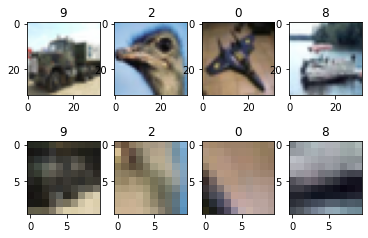

In [10]:
import matplotlib.pyplot as plt
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as c_trans

ds.config.set_seed(1)

# CIFAR-10数据集加载路径
DATA_DIR_CIFAR10 = "./datasets/cifar10/cifar-10-batches-bin/"

# # 加载数据集，选取4张图片
dataset1 = ds.Cifar10Dataset(DATA_DIR_CIFAR10, num_samples=4)

# 使用RandomCrop对原图进行10*10随机裁剪操作
random_crop = c_trans.RandomCrop([10, 10])
dataset2 = dataset1.map(operations=random_crop, input_columns=["image"])


def printDataset(dataset_list, name_list):
    """显示数据集"""
    dataset_sizes = []
    for dataset in dataset_list:
        dataset_sizes.append(dataset.get_dataset_size())
    row = len(dataset_list)      # 画布行数
    column = max(dataset_sizes)  # 画布列数
    pos = 1
    for i in range(row):
        for data in dataset_list[i].create_dict_iterator(output_numpy=True):
            plt.subplot(row, column, pos)                          # 显示位置
            plt.imshow(data['image'])                              # 显示内容
            plt.title(data['label'])                               # 显示标题
            print(name_list[i], " shape:",
                  data['image'].shape, "label:", data['label'])
            pos = pos + 1
        pos = column * (i + 1) + 1


printDataset([dataset1, dataset2], ["Source image", "Cropped image"])

从上面的打印和图片显示结果可以看出，图片随机裁剪前后，标签不变，形状发生了变化。裁剪前的图片分辨率为32×32，裁剪后为10×10。

##### 2.RandomHorizontalFlip

通过[RandomHorizontalFlip](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset_vision/mindspore.dataset.vision.c_transforms.RandomHorizontalFlip.html?highlight=randomhorizontalflip)算子对输入图像进行随机水平翻转。

参数说明：

+ `prob`: 单张图像被翻转的概率，必须在 [0, 1] 范围内。

下面的代码首先加载CIFAR-10数据集，取4张图片，然后对已加载的图片进行概率为0.8的随机水平翻转，最后输出翻转前后的图片形状及对应标签，并对翻转前后的图片进行了展示。

Source image  shape: (32, 32, 3) label: 9
Source image  shape: (32, 32, 3) label: 2
Source image  shape: (32, 32, 3) label: 0
Source image  shape: (32, 32, 3) label: 8
Flipped image  shape: (32, 32, 3) label: 9
Flipped image  shape: (32, 32, 3) label: 2
Flipped image  shape: (32, 32, 3) label: 0
Flipped image  shape: (32, 32, 3) label: 8


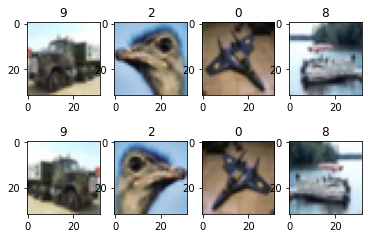

In [11]:
import matplotlib.pyplot as plt
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as c_trans

ds.config.set_seed(1)

# CIFAR-10数据集加载路径
DATA_DIR = "./datasets/cifar10/cifar-10-batches-bin/"

# 使用RandomSampler采样器随机选取4张图片
dataset1 = ds.Cifar10Dataset(DATA_DIR, num_samples=4)

# 使用RandomHorizontalFlip对原图进行随机水平翻转
random_horizontal_flip = c_trans.RandomHorizontalFlip(prob=0.8)
dataset2 = dataset1.map(operations=random_horizontal_flip, input_columns=["image"])

printDataset([dataset1, dataset2], ["Source image", "Flipped image"])

从上面的打印和图片显示结果可以看出，经过随机水平翻转操作后，图像的形状、标签均未发生变化，部分图片被水平翻转。

##### 3.Resize

通过[Resize](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset_vision/mindspore.dataset.vision.c_transforms.Resize.html?highlight=resize)算子对输入图像进行缩放。

参数说明：

+ `size`：图像的输出尺寸大小。若输入整型，将调整图像的较短边长度为 size，且保持图像的宽高比不变；若输入是2元素组成的序列，其输入格式需要是 (高度, 宽度) 。

下面的代码首先加载CIFAR-10数据集，取3张图片，然后将已加载的图片缩放至(101, 101)大小，最后输出缩放前后的图片形状及对应标签，并对图片进行了展示。

Source image  shape: (32, 32, 3) label: 9
Source image  shape: (32, 32, 3) label: 2
Source image  shape: (32, 32, 3) label: 0
Resized image  shape: (101, 101, 3) label: 9
Resized image  shape: (101, 101, 3) label: 2
Resized image  shape: (101, 101, 3) label: 0


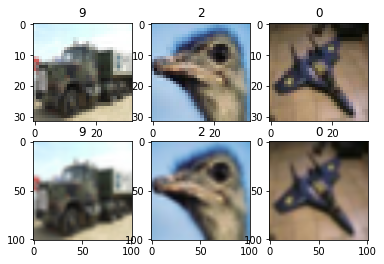

In [12]:
import matplotlib.pyplot as plt
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as c_trans

ds.config.set_seed(1)

# CIFAR-10数据集加载路径
DATA_DIR = "./datasets/cifar10/cifar-10-batches-bin/"

# 加载CIFAR-10数据集，选取3张图片
dataset1 = ds.Cifar10Dataset(DATA_DIR, num_samples=3, shuffle=True)

# 使用Resize操作对图像进行101×101缩放
resize = c_trans.Resize(size=[101, 101])
dataset2 = dataset1.map(operations=resize, input_columns=["image"])

printDataset([dataset1, dataset2], ["Source image", "Resized image"])

从上面的打印和图片显示结果可以看出，缩放前后，图片的形状发生了变化，标签未变。缩放前图片分辨率为32×32，缩放后，图片分辨率为101×101。

##### 4.Invert

通过[Invert](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset_vision/mindspore.dataset.vision.c_transforms.Invert.html?highlight=invert)算子对输入图像进行反相处理。

下面的样例首先加载CIFAR-10数据集，取4张图片，然后定义反相操作并作用于已加载的图片，最后输出反相前后的图片形状和标签，并对图片进行展示。

Source image  shape: (32, 32, 3) label: 9
Source image  shape: (32, 32, 3) label: 2
Source image  shape: (32, 32, 3) label: 0
Source image  shape: (32, 32, 3) label: 8
Inverted image  shape: (32, 32, 3) label: 9
Inverted image  shape: (32, 32, 3) label: 2
Inverted image  shape: (32, 32, 3) label: 0
Inverted image  shape: (32, 32, 3) label: 8


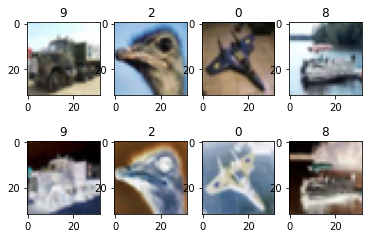

In [13]:
import matplotlib.pyplot as plt
import mindspore.dataset as ds
import mindspore.dataset.vision.c_transforms as c_trans

ds.config.set_seed(1)

# CIFAR-10数据集加载路径
DATA_DIR = "./datasets/cifar10/cifar-10-batches-bin/"

# 加载CIFAR-10数据集，选取4张图片
dataset1 = ds.Cifar10Dataset(DATA_DIR, num_samples=4, shuffle=True)

# 对图片进行反相操作
invert = c_trans.Invert()
dataset2 = dataset1.map(operations=invert, input_columns=["image"])

printDataset([dataset1, dataset2], ["Source image", "Inverted image"])

从上面的打印和图片显示结果可以看出，反相操作前后，图片的形状和标签未变，颜色发生了变化。

#### 2.3.2 py_transforms模块

使用`py_transforms`模块实现数据增强的基本操作与`c_transforms`模块类似。我们这里演示`py_transforms`模块的`Compose`接口使用方法，并用它实现一系列图像增强操作。

`Compose`操作接收一个`transforms`列表，将列表中的数据增强操作依次作用于数据集图片。

下面的样例首先加载CIFAR-10数据集，选取4张图片，然后同时定义缩放、反相和数据类型转换操作（实际使用中用户可根据自己需要更改成自己所需要的操作），并作用于已加载的图片，最后输出处理后的图片形状及对应标签，并对图片进行展示。

Transformed image Shape: (3, 150, 150) , Transformed label: 9
Transformed image Shape: (3, 150, 150) , Transformed label: 2
Transformed image Shape: (3, 150, 150) , Transformed label: 0
Transformed image Shape: (3, 150, 150) , Transformed label: 8


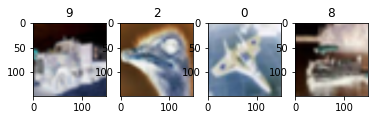

In [14]:
import matplotlib.pyplot as plt
import mindspore.dataset as ds
import mindspore.dataset.vision.py_transforms as py_trans
from mindspore.dataset.transforms.py_transforms import Compose
from PIL import Image

ds.config.set_seed(1)

# CIFAR-10数据集加载路径
DATA_DIR = "./datasets/cifar10/cifar-10-batches-bin/"

# 加载CIFAR-10数据集，选取4张图片
dataset1 = ds.Cifar10Dataset(DATA_DIR, num_samples=4, shuffle=True)

# 定义transforms列表
transforms_list = [
    py_trans.ToPIL(),
    py_trans.Resize(size=[150, 150]),
    py_trans.Invert(),
    py_trans.ToTensor()
]

# 通过Compose操作将transforms列表中函数作用于数据集图片
compose_trans = Compose(transforms_list)
dataset2 = dataset1.map(operations=compose_trans, input_columns=["image"])

# 打印数据增强操作后图片的形状、标签
image_list, label_list = [], []
for data in dataset2.create_dict_iterator():
    image_list.append(data['image'])
    label_list.append(data['label'])
    print("Transformed image Shape:",
          data['image'].shape, ", Transformed label:", data['label'])

num_samples = len(image_list)
for i in range(num_samples):
    plt.subplot(1, len(image_list), i + 1)
    plt.imshow(image_list[i].asnumpy().transpose(1, 2, 0))
    plt.title(label_list[i].asnumpy())

从上面的打印和图片显示结果可以看出，经过transforms列表中的数据增强操作后，图片标签未变，形状发生了变化，分辨率缩放为150×150，并执行了反相操作。

#### 2.3.3 注意事项

在数据管道处理模式中，请谨慎混用`c_transforms`与`py_transforms`，因为两者在数据的计算管道（即Pipeline）中运行的方式存在差异。

混用会引发C++与Python切换的成本，从而降低处理性能，因此建议尽量不要过度混用两个模块的算子。

1. 推荐的使用方式

+ 优先推荐单独使用`py_transform`或`c_transform`。如下图所示，不存在Python层和C++层切换使用的情况。

<div align=center>
    <img src="./images/transform_recommended_1.jpg" width="60%" height="60%" />
</div>

+ 先使用`py_transform`，再使用`c_transform`。如下图所示，先完成Python层的操作后，再完成C++层的操作。

<div align=center>
    <img src="./images/transform_recommended_2.jpg" width="60%" height="60%" />
</div>

+ 先使用`c_transform`，再使用`py_transform`。如下图所示，先完成C++层的操作后，再完成Python层的操作。

<div align=center>
    <img src="./images/transform_recommended_3.jpg" width="60%" height="60%" />
</div>

2. 不推荐的使用方式

在两种transform之间频繁切换。如下图所示，这种在Python层和C++层来回切换的使用方式是极不推荐的。

<div align=center>
    <img src="./images/transform_not_recommended.jpg" width="60%" height="60%" />
</div>

## 3 实验任务

以CIFAR-10数据集为处理对象，选取其中的6张图片，参照所学的`py_transforms`模块的`Compose`算子使用方法，要求采用`c_transforms`模块的`Compose`算子对其实现以下数据增强操作：

1. 对加载的图片进行长宽均为25的随机裁剪；

2. 对图片全部进行水平翻转；

3. 将图片缩放至(50, 50)大小；

4. 对图片全部进行反相操作。

> 关于`c_transforms`模块的`Compose`算子方法，可以参考[c_transforms.Compose API文档](https://www.mindspore.cn/docs/zh-CN/r1.7/api_python/dataset_transforms/mindspore.dataset.transforms.c_transforms.Compose.html#mindspore.dataset.transforms.c_transforms.Compose)。

## 4 小结

1. 视觉数据获取，包括下载、解压和加载方法；
2. 数据预处理，包括数据分批、重复等方法；
3. 使用c_transforms模块和py_transforms模块。